In [24]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_curve,auc
#import xgboost as xgb

In [26]:
##importing dataset
df  = pd.read_csv(r'C:\Users\GLADY\Desktop\Python ProjeKt\XYZCorp_LendingData.txt',header=0,delimiter ="\t")
#print(mydata)

C:\Users\GLADY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
###checking for null vLUES
#pd.set_option('display.max_rows',None)
#df.isnull().sum()

In [28]:
df1=df[['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade',
        'emp_title','emp_length','home_ownership','annual_inc','verification_status','issue_d','pymnt_plan','desc','purpose',
        'title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq',
        'mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp',
        'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
        'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d',
        'collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint',
        'dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m',
        'open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
        'all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','default_ind']]


df2=df[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','emp_length','home_ownership',
        'annual_inc','verification_status','issue_d','purpose','addr_state','dti','delinq_2yrs','earliest_cr_line',
        'inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp',
        'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
        'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','acc_now_delinq',
        'tot_coll_amt','tot_cur_bal','total_rev_hi_lim','default_ind']]


In [30]:
#replacing null 8k values with mode..tyhere are 4l repeating values of mode

df2["last_pymnt_d"].fillna("Jan-2016", inplace = True) 
#mydata3.last_pymnt_d.isnull().sum() 

df2["last_credit_pull_d"].fillna("Jan-2016", inplace = True)
#mydata3.last_credit_pull_d.isnull().sum() 

#replacing with mean values

df2["total_rev_hi_lim"].fillna(df2.total_rev_hi_lim.mean(), inplace = True) 
#mydata3.total_rev_hi_lim.isnull().sum()

df2["revol_util"].fillna(df2.revol_util.mean(), inplace = True) 
#mydata3.revol_util.isnull().sum()

df2["tot_coll_amt"].fillna(df2.tot_coll_amt.mean(), inplace = True) 
#mydata3.tot_coll_amt.isnull().sum()

df2["tot_cur_bal"].fillna(df2.tot_cur_bal.mean(), inplace = True) 
#mydata3.tot_cur_bal.isnull().sum()

df2["emp_length"].fillna("10+ years", inplace = True)
df2.emp_length.isnull().sum() 

C:\Users\GLADY\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [45]:
df2.purpose.nunique()

4

In [41]:
#df2.emp_length.head

In [32]:
df2['emp_length']=df2.emp_length.replace(['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years'
                                          ,'9 years','10+ years'],
                                         ['low','low','low','medium','medium','medium','high','high','high','v.high','v.high'])

C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
df2['purpose']=df2.purpose.replace(['debt_consolidation','credit_card','home_improvement','other','major_purchase','small_business','car','medical',
                                    'moving','vacation','house','wedding','renewable_energy','educational'],
                                   ['debt_consolidation1','credit_card','home_improvement','others','others','others','others','others','others','others','others','others','others','others'])

C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
###not requiresd df2.purpose.replace(['4','5','6','7','8','9','10','11','12','13','14'],[4,4,4,4,4,4,4,4,4,4,4])

In [38]:
#purpose=df2['purpose']
#Bins=[1,2,3,4]
#Binlabels=['debt_consolidation','credit_card','home_improvement','others']
#categories=pd.cut(purpose,Bins,labels=Binlabels,include_lowest=True)
#print(categories.value_counts())

In [47]:
###checking for null vLUES
#pd.set_option('display.max_rows',None)
#df2.isnull().sum()

In [36]:
##CREATING LIST OF ALL CATEGORICAL VARIABLES.

colname=['emp_length','addr_state','application_type','grade', 'home_ownership','initial_list_status','purpose','term','verification_status']

#colname

In [38]:
# for preprocessing the data

from sklearn import preprocessing

le={}##creating empty dictionary
##LABEL ENCODING IS USED TO CONVERT CATEGORICAL TO NUMERICAL DATA
#creating dictionary in first for loop && transforming in second
for x in colname:
    le[x]=preprocessing.LabelEncoder()
for x in colname:
    df2[x]=le[x].fit_transform(df2[x])##firtransform to replace original values

C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [40]:
df3=df2

### 

In [42]:
df4=df3

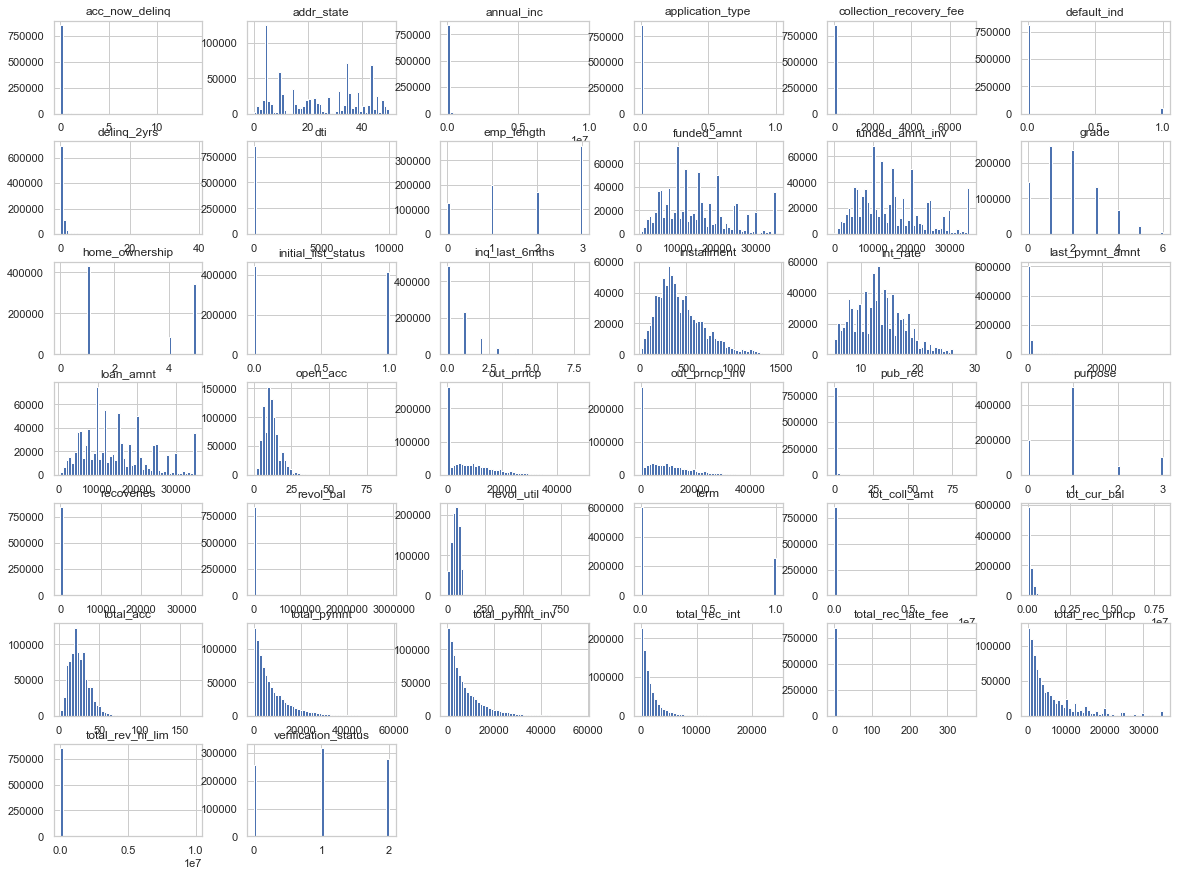

In [82]:
#To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.

%matplotlib inline
import matplotlib.pyplot as plt
df3.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

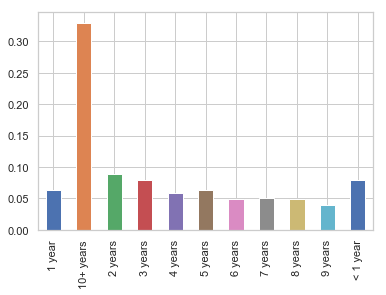

In [83]:
# have a look at the distribution of the employment length
(df['emp_length'].value_counts().sort_index()/len(df)).plot.bar()

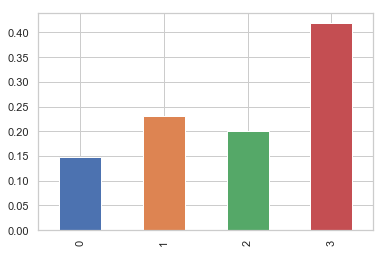

In [202]:
# have a look at the distribution of the employment length after reducing levels
(df2['emp_length'].value_counts().sort_index()/len(df)).plot.bar()

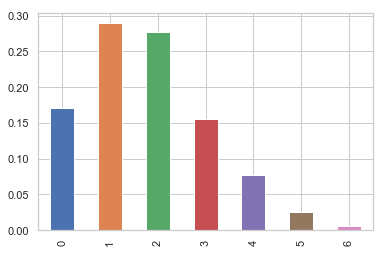

In [70]:
#Which grades occur most often?
(df2['grade'].value_counts().sort_index()/len(df3)).plot.bar()

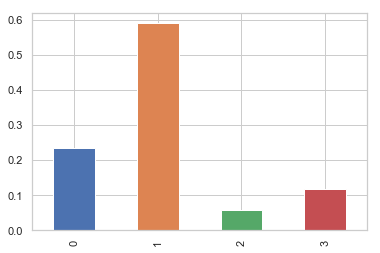

In [87]:
#distribution of purpose
(df2['purpose'].value_counts().sort_index()/len(df3)).plot.bar()

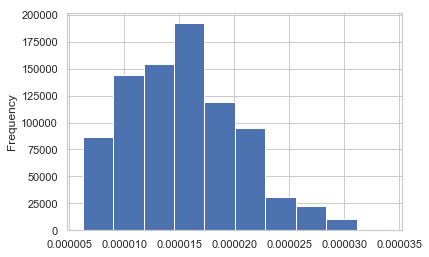

In [98]:
#Let's have a look at the distirubtion of the interest rates.
(df3['int_rate']/len(df)).plot.hist(bins=10)

In [44]:
##converting date objects in dataframe to datetime format
df3['issue_d']=pd.to_datetime(df3['issue_d'])
df3['earliest_cr_line']=pd.to_datetime(df3['earliest_cr_line'])
df3['last_pymnt_d']=pd.to_datetime(df3['last_pymnt_d'])
df3['last_credit_pull_d']=pd.to_datetime(df3['last_credit_pull_d'])

C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [46]:
#splitting the dataframe into 2 different frames based on date.
traindf=df3[df3['issue_d']<='2015-05-01']
testdf=df3[df3['issue_d']>'2015-05-01']

In [48]:
#converting date objects in train data to ordinal format
traindf['issue_d']=traindf['issue_d'].apply(datetime.toordinal)
traindf['earliest_cr_line']=traindf['earliest_cr_line'].apply(datetime.toordinal)
traindf['last_pymnt_d']=traindf['last_pymnt_d'].apply(datetime.toordinal)
traindf['last_credit_pull_d']=traindf['last_credit_pull_d'].apply(datetime.toordinal)

TypeError: descriptor 'toordinal' requires a 'datetime.date' object but received a 'int'

In [ ]:
testdf['issue_d']=testdf['issue_d'].apply(datetime.toordinal)
testdf['earliest_cr_line']=testdf['earliest_cr_line'].apply(datetime.toordinal)
testdf['last_pymnt_d']=testdf['last_pymnt_d'].apply(datetime.toordinal)
testdf['last_credit_pull_d']=testdf['last_credit_pull_d'].apply(datetime.toordinal)

In [63]:
#testdf.issue_d.describe()
#testdata.head()

In [113]:
#The variable we are going to predict is the “last sold price”.
#So let’s look at how much each independent variable correlates with this dependent variable.

#corr_matrix = traindf.corr()
#corr_matrix["default_ind"].sort_values(ascending=False)

In [ ]:
X_traindf=traindf.iloc[:,0:-1]
Y_traindf=traindf.iloc[:,-1]
X_testdf=testdf.iloc[:,0:-1]
Y_testdf=testdf.iloc[:,-1]

In [ ]:
#scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
clf = LogisticRegression(penalty='l1', C=0.1)

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

In [ ]:
pipe_lr.fit(X_traindf, Y_traindf)

In [ ]:
#Evaluating the Logistic Regression¶
#Let's see how well the model works by plotting the ROC-curve and calculating the ROC-AUC-Score.

ROC-AUC-score:  0.9543693099168357


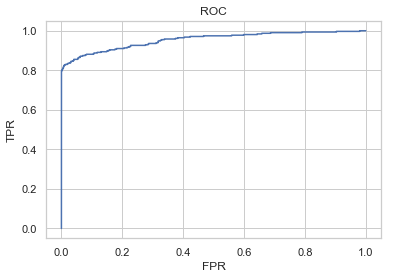

In [19]:
test_probas = pipe_lr.predict_proba(X_testdf)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(Y_testdf, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(Y_testdf, test_probas))
#better the roc-auc-score better were the predictions

In [ ]:
##scaling is optional to elimitate ranges in miltiple numerical data
##fiting part is done on training data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_traindf)

X_traindf = scaler.transform(X_traindf)

X_testdf = scaler.transform(X_testdf)
print(X_traindf)
print(X_testdf)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(X_traindf, Y_traindf)
print(rfe.support_)
print(rfe.ranking_)

In [132]:
#%%
from sklearn.linear_model import LogisticRegression
#create a model

classifier = LogisticRegression()
#fittingn training data to the model
classifier.fit(X_traindf,Y_traindf)

Y_preddf=classifier.predict(X_testdf)
print(list(zip(Y_testdf, Y_preddf)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [ ]:
#Fit logistic regression to the training set

classifier = LogisticRegression(random_state=0,penalty='l2',verbose=0)
classifier.fit(X_traindf, Y_traindf)

In [24]:
#Predicting the test set results and creating confusion matrix

Y_preddf = pipe_lr.predict(X_testdf)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_testdf, Y_preddf)
print(confusion_matrix)
#Y_pred

[[256627     53]
 [    64    247]]


In [25]:
#Accuracy
pipe_lr.score(X_testdf, Y_testdf)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_testdf, Y_testdf)))

0.9995447311384446

In [52]:
##evaluating model using cross validation
#Using cross validation



from sklearn.linear_model import LogisticRegression
#classifier=LgisticRegression()
#performing kfold_cross_validation
svc_model=LogisticRegression()
from sklearn import cross_validation
#performing k_foldcross_validation
kfold_cv=cross_validation.KFold(n=len(X_traindf),n_folds=10)
print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_validation.cross_val_score(estimator=classifier,X=X_traindf,
y=Y_traindf, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


sklearn.cross_validation.KFold(n=598978, n_folds=10, shuffle=False, random_state=None)


NameError: name 'classifier' is not defined

In [26]:
#Compute precision, recall, F-measure and support
#To quote from Scikit Learn:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
#The support is the number of occurrences of each class in y_test.

from sklearn.metrics import classification_report
print(classification_report(Y_testdf, Y_preddf))

#Classifier visualization playground

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    256680
          1       0.82      0.79      0.81       311

avg / total       1.00      1.00      1.00    256991



In [27]:
learning_rates = [0.05,0.1,0.25,0.5,0.75,1]
for learning_rate in learning_rates:
    gb=GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate, max_features=2,max_depth=2, random_state=0)
    gb.fit(X_traindf,Y_traindf)
    print("Learning rate: ",learning_rate)
    print("accuracy score training:{0:3f}".format(gb.score(X_traindf,Y_traindf)))
    print("accuracy score testing:{0:3f}".format(gb.score(X_testdf,Y_testdf)))
    print()    

Learning rate:  0.05
accuracy score training:0.922989
accuracy score testing:0.998790

Learning rate:  0.1
accuracy score training:0.946400
accuracy score testing:0.998790

Learning rate:  0.25
accuracy score training:0.967192
accuracy score testing:0.999300

Learning rate:  0.5
accuracy score training:0.976134
accuracy score testing:0.999564

Learning rate:  0.75
accuracy score training:0.985534
accuracy score testing:0.999560

Learning rate:  1
accuracy score training:0.982859
accuracy score testing:0.960228



In [33]:
gb=GradientBoostingClassifier(n_estimators=20,learning_rate=0.5, max_features=2,max_depth=2, random_state=0)
gb.fit(X_traindf,Y_traindf)
predictions=gb.predict(X_testdf)
print("Confusuouin Matrix:")
print(confusion_matrix(Y_testdf,predictions))
print()
print("classification_report")
print(classification_report(Y_testdf,predictions))

Confusuouin Matrix:


TypeError: 'numpy.ndarray' object is not callable

In [28]:
df5=df4

In [33]:
df4['issue_d']=pd.to_datetime(df4['issue_d'])
df4['earliest_cr_line']=pd.to_datetime(df4['earliest_cr_line'])
df4['last_pymnt_d']=pd.to_datetime(df4['last_pymnt_d'])
df4['last_credit_pull_d']=pd.to_datetime(df4['last_credit_pull_d'])

C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [34]:
df4['issue_d']=df4['issue_d'].apply(datetime.toordinal)
df4['earliest_cr_line']=df4['earliest_cr_line'].apply(datetime.toordinal)
df4['last_pymnt_d']=df4['last_pymnt_d'].apply(datetime.toordinal)
df4['last_credit_pull_d']=df4['last_credit_pull_d'].apply(datetime.toordinal)

C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\GLADY\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [35]:
X9 = df4.values[:,:-1]
Y9 = df4.values[:,-1]

In [36]:
##scaling the data IN X to avoid discrepancy

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X9)

X9 = scaler.transform(X9)
print(X9)

[[-1.15669837 -1.15593762 -1.15420026 ...  0.          0.
   0.        ]
 [-1.45342247 -1.45286854 -1.4479409  ...  0.          0.
   0.        ]
 [-1.46529144 -1.46474577 -1.45980921 ...  0.          0.
   0.        ]
 ...
 [-0.20718124 -0.20575867 -0.20176851 ... -0.02238781 -0.71458472
  -0.39140032]
 [-0.32587088 -0.32453104 -0.32045159 ... -0.02238781 -0.55053679
  -0.14269172]
 [ 0.62364625  0.6256479   0.62901308 ... -0.02238781 -0.72047935
   0.26353235]]


In [37]:
from sklearn.cross_validation import train_test_split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, Y9, test_size=0.2, random_state=10)

In [39]:
#%%
from sklearn.linear_model import LogisticRegression
#create a model

classifier9 = LogisticRegression()
#fittingn training data to the model
classifier9.fit(X_train9,y_train9)

Y_pred9=classifier9.predict(X_testdf)
print(list(zip(y_test9, Y_pred9)))


[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.

In [38]:
#Fit logistic regression to the training set

classifier10 = LogisticRegression(random_state=10,penalty='l2',verbose=0,C=100)
classifier10.fit(X_train9, y_train9)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
#Predicting the test set results and creating confusion matrix

Y_pred9 = classifier10.predict(X_testdf)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test9, Y_pred9)
print(confusion_matrix)
#Y_pred

ValueError: Found input variables with inconsistent numbers of samples: [171194, 256991]

In [201]:
#Accuracy
classifier10.score(X_test9, y_test9)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_testdf, Y_testdf)))

0.9975875322733273

In [217]:
#(df2['annual_inc'].value_counts().sort_index()/len(df2)).plot.bar()

In [ ]:
# Multiple box plots on one Axes
#fig, ax = plt.subplots()
#ax.boxplot(X9.annual_inc)

#plt.show()

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_traindf, Y_traindf)
> GradientBoostingClassifier(criterion=’friedman_mse’, init=None,
 learning_rate=0.1, loss=’deviance’, max_depth=3,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, presort=’auto’, random_state=None,
 subsample=1.0, verbose=0, warm_start=False)
y_pred = model.predict(x_testdf)

SyntaxError: invalid syntax (<ipython-input-28-0f4ff3d577d4>, line 4)

In [29]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
##############GRADIENT BOOSTING###########################3

In [231]:
#Run a baseline model without tuning
#I use the following baseline scikit-learn library settings.

#Tree specific parameters
#n_estimators=100 (number of trees) 
#max_depth=3 
#min_samples_split=2 
#min_samples_leaf=1 
##subsample=1.0

#Other Parameters
#learning_rate=0.1 (shrinkage) 
#subsample: 1

Accuracy of the GBM on test set: 0.967
             precision    recall  f1-score   support

          0       1.00      0.97      0.98    256680
          1       0.04      0.99      0.07       311

avg / total       1.00      0.97      0.98    256991



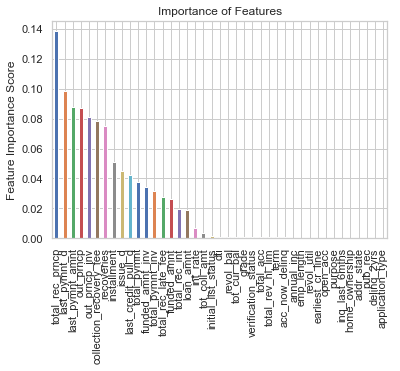

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_traindf,Y_traindf)
predictors=list(X_traindf)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_testdf, Y_testdf)))
pred=baseline.predict(X_testdf)
print(classification_report(Y_testdf, pred))
plt.savefig('map1.png')

In [ ]:
The plot displays the importance of the feature: The number of words in capital and bang seem to have 4
the highest predictive power.

With this first model, we obtain a rate of 0.04 of true positives (positive meaning spam) and 1.00 true negatives and 
an accuracy of 0.967.

In [ ]:
n_estimators captures the number of trees that we add to the model. A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx.
10-fold increase in n_estimators.

In [ ]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_traindf,Y_traindf)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [ ]:
max_depth¶
max_depth bounds the maximum depth of the tree. We can use the obtained results to tune the max_depth parameter. 
There is one interesting comment on depth in the scikit-learn documentation especially relevant for large datasets:
    "We found that max_leaf_nodes=k gives comparable results to max_depth=k-1 but
    is significantly faster to train at the expense of a slightly higher training error."

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_traindf,Y_traindf)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

In [ ]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
#randomforest
model3=RandomForestClassifier(n_estimators=100)
model3.fit(X_traindf,Y_traindf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
model3.score(X_testdf,Y_testdf)

0.9502083730558658

In [43]:
#Let’s apply a random forest consisting of 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_traindf, Y_traindf)
print("Accuracy on training set: {:.3f}".format(rf.score(X_traindf, Y_traindf)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_testdf, Y_testdf)))

Accuracy on training set: 1.000
Accuracy on test set: 0.929


In [44]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_traindf, Y_traindf)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_traindf, Y_traindf)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_testdf, Y_testdf)))

Accuracy on training set: 0.962
Accuracy on test set: 0.999


In [ ]:
It did not, this indicates that the default parameters of the random forest work well.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
model_features = [x for i,x in enumerate(df2.columns) if i!=44]


In [71]:
#Feature importance in Random Forest
#from sklearn.tree import DecisionTreeClassifier
#import matplotlib.pyplot as plt
#%matplotlib inline
#def plot_feature_importances(rf1, X_traindf, Y_traindf=None,top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    
importances =rf1.feature_importances_    

#plot_feature_importances

In [72]:
importances

array([4.92876352e-03, 5.49895040e-03, 4.27562129e-03, 2.19666135e-03,
       5.96441700e-03, 3.14042669e-03, 1.08146842e-02, 0.00000000e+00,
       9.11956811e-05, 2.63939671e-04, 3.61712933e-04, 1.12988714e-02,
       6.67656798e-07, 0.00000000e+00, 2.32499181e-04, 0.00000000e+00,
       4.49554676e-06, 5.03584263e-05, 0.00000000e+00, 0.00000000e+00,
       2.54256210e-06, 2.67811716e-04, 0.00000000e+00, 5.30899755e-04,
       6.41415677e-02, 6.32359578e-02, 1.60886524e-02, 3.76961921e-02,
       8.99877736e-02, 1.34212596e-03, 8.95437988e-03, 2.39182944e-01,
       3.00683873e-01, 7.49610524e-02, 3.67592383e-02, 1.69346585e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.53274829e-08,
       1.07009677e-04])

Feature ranking:
1. feature 32 (0.300684)
2. feature 31 (0.239183)
3. feature 28 (0.089988)
4. feature 33 (0.074961)
5. feature 24 (0.064142)
6. feature 25 (0.063236)
7. feature 27 (0.037696)
8. feature 34 (0.036759)
9. feature 35 (0.016935)
10. feature 26 (0.016089)
11. feature 11 (0.011299)
12. feature 6 (0.010815)
13. feature 30 (0.008954)
14. feature 4 (0.005964)
15. feature 1 (0.005499)
16. feature 0 (0.004929)
17. feature 2 (0.004276)
18. feature 5 (0.003140)
19. feature 3 (0.002197)
20. feature 29 (0.001342)
21. feature 23 (0.000531)
22. feature 10 (0.000362)
23. feature 21 (0.000268)
24. feature 9 (0.000264)
25. feature 14 (0.000232)
26. feature 40 (0.000107)
27. feature 8 (0.000091)
28. feature 17 (0.000050)
29. feature 16 (0.000004)
30. feature 20 (0.000003)
31. feature 12 (0.000001)
32. feature 39 (0.000000)
33. feature 15 (0.000000)
34. feature 13 (0.000000)
35. feature 18 (0.000000)
36. feature 7 (0.000000)
37. feature 19 (0.000000)
38. feature 22 (0.000000)
39. feature 36

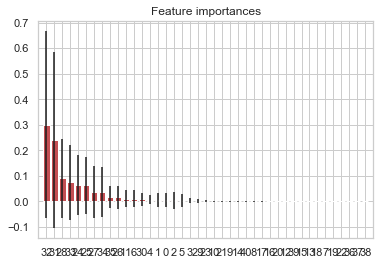

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1280 with 0 Axes>

In [75]:
std = np.std([tree.feature_importances_ for tree in rf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_traindf.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_traindf.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_traindf.shape[1]), indices)
plt.xlim([-1, X_traindf.shape[1]])
plt.show()
plt.savefig('map34.png')
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')